# ANALISI DISTRIBUZIONE DEI DATI SULLA BASE DEI GRUPPI GENETICI (POLIMORIFSMO rs53576)


quello che andremo a fare sarà:
* creare una nuova colonna, che verrà definita GROUPS_rs53576, in cui verranno etichettati come "SENSIBLE" i portatori dell'alelle G, "no_SENSIBLE" gli omozigoti per l'allele A
* contare il numero dei partecipanti per ogni gruppo
* valutare se vi siano differenze statisticamente significative per età tra i due gruppi 
* valutare se vi siano differenze statisticamente significative per le variabili ambientali tra i due gruppi genetici

In [4]:
import pandas as pd

import numpy as np

import scipy.stats as stats

datafile = '\\Users\\sarac\\OneDrive\\Documenti\\Magistrale_tn\\GeneEnv_Analysis\\SNG_PBI_ASQ_ECR_DNA_selected.csv'
data= pd.read_csv(datafile)


dataframe=data.drop(data.loc[:, 'ECR_Anxiety':'ECR_Avoidance'].columns, axis = 1)
df1=dataframe.drop(dataframe.loc[:, 'PBI_M_1':'ECR36_Avoid_18R'].columns, axis = 1)
df=df1.drop(df1.loc[:, 'ASQ_Confidence':'ASQ_Worry'].columns, axis = 1)


Gli eterozigoti sono stati etichettati sia come 'GA' che come 'AG'. Scelgo di definirli tutti AG, perciò sostituisco quelli etichettati GA 

In [5]:
df['rs53576'] = df['rs53576'].replace(['GA'], 'AG')

Adesso calcolo le frequenze dei tre gruppi allelici

In [6]:
frequencies=df['rs53576'].value_counts()
frequencies

AA    16
AG    15
GG     8
Name: rs53576, dtype: int64

Divisione nei gruppi genetici SENSIBLE/No SENSIBLE, in accordo con frequenze popolazione generale ricavata da banca dati Ensembl. 


La presenza dell'allele G conferisce suscettibilità

In [7]:
groups_rs53576=[]

In [8]:
for row in df['rs53576']:
    if row == 'AG':
        groups_rs53576.append('SENSIBLE')
    elif row == 'GG':
        groups_rs53576.append('SENSIBLE')
        
    elif row=='AA':
         groups_rs53576.append('no_SENSIBLE')
        
    else:
        groups_rs53576.append('naN')
            

In [9]:
df['GROUPS_rs53576']=groups_rs53576
df

ID CODE SEX  AGE SAMPLE  ETHNICITY  PBI_M_care  PBI_M_overp  PBI_F_care  \
0    ALE24LEE   F   21    SNG     indian          36           17          27   
1    AMI12HAM   M   23    SNG      malay          20           19          11   
2    BRA13LEO   M   22    SNG    chinese          27            4          27   
3     CAI15MA   F   19    SNG    chinese          25            8          13   
4    CHA11DIN   F   20    SNG    chinese          27           23          25   
5    CHE24LIM   M   22    SNG    chinese          26           12          28   
6    CUI31LOH   F   22    SNG    chinese          20            6          19   
7    DAN02GAR   F   20    SNG  caucasian          24           30          36   
8    DIN27CAI   F   23    SNG    chinese          19           19          22   
9    EST25CHI   F   21    SNG    chinese          17           12          17   
10   GAB19NEO   F   19    SNG    chinese          10           12          31   
11   HAO21TAN   M   26    SNG    chinese          11           17           3   
12    ISA16HO   M   23    SNG    chinese          28           11          24   
13   JAR03LEE   M   23    SNG    chinese          10           22          14   
14   JAS31CHA   F   22    SNG    chinese          12           35          14   
15   JIA26CHA   F   19    SNG    chinese          25           14          17   
16    JIE06YE   F   22    SNG    chinese          28           14          18   
17    JIN17HE   F   21    SNG    chinese          33           12          16   
18   JUN09YAP   M   24    SNG    chinese          25           11          23   
19    LIM18OH   F   20    SNG    chinese          30            1          25   
20   LIN25ZHU   F   21    SNG    chinese          34           11          17   
21   LIS23HAS   F   22    SNG      malay          20           16           4   
22   MEG04TAN   F   19    SNG    chinese          19           10          19   
23   MER09SEO   F   19    SNG    chinese          32           17          31   
24   MOH03JUN   M   23    SNG     indian          31           24          16   
25   NEO20HUA   M   17    SNG    chinese          32           13          30   
26   NOR02LEE   M   24    SNG    chinese          18           19          23   
27   NUR19KAR   F   19    SNG      malay          33           10          21   
28   ONG29PUA   M   22    SNG    chinese          20           15          18   
29   SEO08LOW   M   22    SNG    chinese          17           10           2   
30   SHI03TAY   F   24    SNG    chinese          20           19          20   
31   SIM12LIM   F   22    SNG    chinese          26           14          34   
32   STE03SOH   F   22    SNG    chinese          24            3          32   
33   UTE03TAY   M   22    SNG    chinese          35            4          33   
34   VAL28QUA   F   20    SNG    chinese          17           10           2   
35  WEN23KWEK   M   23    SNG    chinese          28            5          20   
36   WEN23NEO   M   19    SNG    chinese          24           15          23   
37   WON07SIM   F   21    SNG    chinese           8            4          18   
38   YIZ05LAU   M   21    SNG    chinese          26           17          16   

    PBI_F_overp rs53576 rs2254298 5HTTLPR 5HT rs25531 GROUPS_rs53576  
0            12      GG        GG      na          TC       SENSIBLE  
1            19      AG        GG      na          TT       SENSIBLE  
2             8      AA        GA      na          TT    no_SENSIBLE  
3             4      AA        GG      na          TT    no_SENSIBLE  
4            12      AG        GA      na          TT       SENSIBLE  
5             0      AA        GA      na          TC    no_SENSIBLE  
6             1      AA        GA      na          TC    no_SENSIBLE  
7            11      GG        GG      na          TT       SENSIBLE  
8            15      AG        GG      na          TT       SENSIBLE  
9            12      GG        GG      na          TT  

Conto quanti partecipanti ottengo dalla suddivisione nei due gruppi

In [10]:
df['GROUPS_rs53576'].value_counts()

SENSIBLE       23
no_SENSIBLE    16
Name: GROUPS_rs53576, dtype: int64

In [11]:
U, p = stats.mannwhitneyu(df.query('GROUPS_rs53576 == "SENSIBLE"')['AGE'],
                              df.query('GROUPS_rs53576 == "no_SENSIBLE"')['AGE'])
    
print(U, p)

157.0 0.22041227853242285


<AxesSubplot:title={'center':'AGE'}, xlabel='GROUPS_rs53576'>

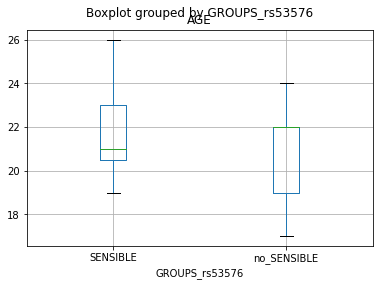

In [12]:
 df.boxplot('AGE', by='GROUPS_rs53576')

Non ci sono differenze statisticamente significative per età fra i due gruppi genetici

In [13]:
for target in ['PBI_M_care', 'PBI_M_overp', 'PBI_F_care', 'PBI_F_overp']:
    U, p = stats.mannwhitneyu(df.query('GROUPS_rs53576 == "SENSIBLE"')[target],
                              df.query('GROUPS_rs53576 == "no_SENSIBLE"')[target])
    
    print(target, U, p)

PBI_M_care 159.5 0.24609991801504383
PBI_M_overp 96.0 0.006122066950831415
PBI_F_care 162.5 0.27415603138790345
PBI_F_overp 104.5 0.01180872013222717


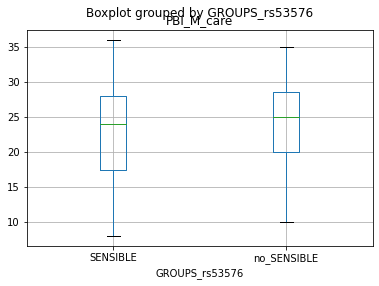

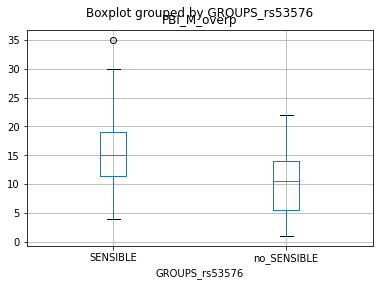

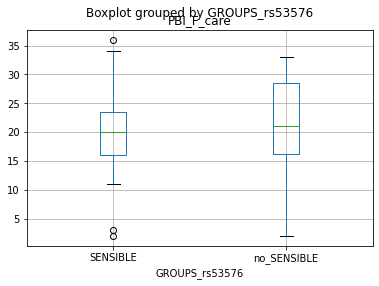

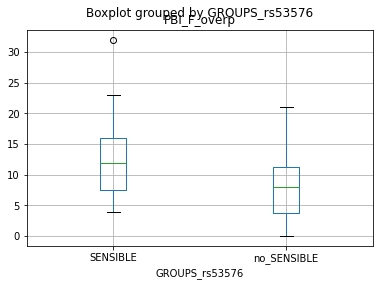

In [14]:
for target in ['PBI_M_care', 'PBI_M_overp', 'PBI_F_care', 'PBI_F_overp']:
    df.boxplot(target, by='GROUPS_rs53576')

nelle scale di overprotection ci sono differenze statisticamente significative tra i punteggi dei due gruppi